# Demo 3: Practical pandas
*Author: Saranapob (Great) Thavapatikom*

© 2021 Skooldio Co., Ltd. This document contains proprietary information of Skooldio Co., Ltd. and shall not be reproduced, distributed, or transmitted, 
in whole or in part, without the prior written permission of Skooldio. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#อย่าลืมกลับมา import ตรงนี้ใหม่ หากว่า Runtime ของ Notebook หมดอายุ
import numpy as np
import pandas as pd

# Working with More Data Formats

## Creating a DataFrame from scratch
เราสามารถสร้าง DataFrame ขึ้นมาเองได้ง่ายๆ หลายวิธี ในเบื้องต้นเรามาลองกัน 3 วิธี
1. สร้างจาก dict
2. สร้างจาก list of dicts
3. สร้างจาก json



### DataFrame from dict
Syntax:
```python
{
    'ชื่อคอลัมน์ที่ 1': [ข้อมูลของคอลัมน์ที่ 1],
    'ชื่อคอลัมน์ที่ 2': [ข้อมูลของคอลัมน์ที่ 2],
    ...
}
```

In [ ]:
#สมมติเรามีข้อมูลดังนี้แบบ dict
data_1 = {
    'name': ['Cherprang', 'Jennie', 'Seohyun'],
    'lucky_number': [31, 99, 7]
}

In [ ]:
#สร้าง DataFrame จาก dict เมื่อกี๊
df_1 = pd.DataFrame(data_1)
df_1

,name,lucky_number
0,Cherprang,31
1,Jennie,99
2,Seohyun,7


### DataFrame from list of dicts
Syntax: 1 dict = 1 row

In [ ]:
#สมมติมีข้อมูลแบบ list of dicts (1 dict = 1 row)
data_2 = [{'name': 'Cherprang', 'lucky_number': 31},
          {'name': 'Jennie', 'lucky_number': 99},
          {'name': 'Seohyun', 'lucky_number': 7}]

In [ ]:
#สร้าง DataFrame จาก list of dicts เมื่อกี๊
df_2 = pd.DataFrame(data_2)
df_2

,name,lucky_number
0,Cherprang,31
1,Jennie,99
2,Seohyun,7


### Bonus: DataFrame from json
ข้อมูลที่เราดึงมาจาก API ใน internet มักจะอยู่ในรูปแบบของ .json ซึ่งถ้าพูดแบบลวกๆ ก็คล้ายๆ กับ dict ถ้าเราจัดการกับ json ให้มีโครงสร้างเหมาะสม ก็สามารถแปลงเป็นข้อมูลตาราง DataFrame ได้

ในที่นี้เราจะลองดึงข้อมูล id, name, weight และ height ของ Pokemon 151 ตัวแรกกันจาก API https://pokeapi.co/

ลองดึงข้อมูลของโปเกมอน id=1 จาก https://pokeapi.co/api/v2/pokemon/1/

In [ ]:
import requests
import time

all_data = []
#ดึงข้อมูลตั้งแต่ id=1 ถึง id=151 เฉพาะ key = ['id','name','height','weight']
for id in range(1, 152):
    response = requests.get(f'https://pokeapi.co/api/v2/pokemon/{id}/')
    data = response.json()
    data = {k: v for k, v in data.items() if k in ['id','name','height','weight']}
    all_data.append(data)
    time.sleep(1) #เป็นพลเมืองดี รอ 1 วินาทีก่อน ค่อยดึงใหม่ (ถ้าใจร้อนก็อาจจะ 0.1s)

print(len(all_data))

151


In [ ]:
#ลองดูว่า all_data หน้าตาเป็นอย่างไร
all_data

[{'height': 7, 'id': 1, 'name': 'bulbasaur', 'weight': 69},
 {'height': 10, 'id': 2, 'name': 'ivysaur', 'weight': 130},
 {'height': 20, 'id': 3, 'name': 'venusaur', 'weight': 1000},
 {'height': 6, 'id': 4, 'name': 'charmander', 'weight': 85},
 {'height': 11, 'id': 5, 'name': 'charmeleon', 'weight': 190},
 {'height': 17, 'id': 6, 'name': 'charizard', 'weight': 905},
 {'height': 5, 'id': 7, 'name': 'squirtle', 'weight': 90},
 {'height': 10, 'id': 8, 'name': 'wartortle', 'weight': 225},
 {'height': 16, 'id': 9, 'name': 'blastoise', 'weight': 855},
 {'height': 3, 'id': 10, 'name': 'caterpie', 'weight': 29},
 {'height': 7, 'id': 11, 'name': 'metapod', 'weight': 99},
 {'height': 11, 'id': 12, 'name': 'butterfree', 'weight': 320},
 {'height': 3, 'id': 13, 'name': 'weedle', 'weight': 32},
 {'height': 6, 'id': 14, 'name': 'kakuna', 'weight': 100},
 {'height': 10, 'id': 15, 'name': 'beedrill', 'weight': 295},
 {'height': 3, 'id': 16, 'name': 'pidgey', 'weight': 18},
 {'height': 11, 'id': 17, 'na

In [ ]:
#สร้าง DataFrame จากผลลัพธ์ที่ดึงมา
df_poke = pd.DataFrame(all_data)
df_poke

,height,id,name,weight
0,7,1,bulbasaur,69
1,10,2,ivysaur,130
2,20,3,venusaur,1000
3,6,4,charmander,85
4,11,5,charmeleon,190
...,...,...,...,...
146,18,147,dratini,33
147,40,148,dragonair,165
148,22,149,dragonite,2100
149,20,150,mewtwo,1220


In [ ]:
df_poke[['id','name','height','weight']]

,id,name,height,weight
0,1,bulbasaur,7,69
1,2,ivysaur,10,130
2,3,venusaur,20,1000
3,4,charmander,6,85
4,5,charmeleon,11,190
...,...,...,...,...
146,147,dratini,18,33
147,148,dragonair,40,165
148,149,dragonite,22,2100
149,150,mewtwo,20,1220


## Importing an Excel File
เริ่มจาก import ไฟล์ .xlsx หรือ .xls ด้วย method `pd.read_excel('ที่อยู่ของไฟล์')`

**NOTE: ใช้ Colab บน Google Drive อย่าลืม Mount Drive!**

ลอง Import ไฟล์ excel ที่ `'./drive/MyDrive/Skooldio/data/excel_example1.xlsx'`

In [ ]:
#ลอง import ไฟล์ excel_example1.xlsx
df_excel_1 = pd.read_excel('./drive/MyDrive/Skooldio/data/excel_example1.xlsx')
df_excel_1

,รหัสสถานศึกษา,ชื่อสถานศึกษา,กระทรวง,ภาค,สังกัด,ตรอก,ซอย,ถนน,จังหวัด,อำเภอ,...,โทร 1,โทร 2,fax,email,เว็บไซต์,ชื่อผู้บริหาร,LATITUDE,LONGITUDE,จำนวนนักเรียน,จำนวนครู
0,1058420056,บ้านเมืองแปง,กระทรวงศึกษาธิการ,สำนักงานศึกษาธิการภาค 15,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,-,NaN,NaN,แม่ฮ่องสอน,ปาย,...,NaN,NaN,NaN,mp.school_pai@hotmail.com,muangpang.mhs1.go.th,นายพงษ์ศักดิ์ ชื่นจิตร,19.21366,98.3686,253.0,16.0
1,1058420063,บ้านสบสา,กระทรวงศึกษาธิการ,สำนักงานศึกษาธิการภาค 15,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,-,NaN,NaN,แม่ฮ่องสอน,ปาย,...,646895874,622733719,NaN,NaN,NaN,นายณัฐนันท์ เรืองชัย,19.22133,98.41897,32.0,6.0
2,1057120413,ห้วยน้ำขุ่นวิทยา,กระทรวงศึกษาธิการ,สำนักงานศึกษาธิการภาค 16,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,-,NaN,NaN,เชียงราย,แม่สรวย,...,53163390,53160131,53163390,huainamkhun@gmail.com,www.hnkschool.com,นายสนิท นันทชัย,19.497934,99.327034,743.0,40.0
3,1058420069,บ้านดอยผีลู,กระทรวงศึกษาธิการ,สำนักงานศึกษาธิการภาค 15,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,-,NaN,NaN,แม่ฮ่องสอน,ปาย,...,-,-,-,-,-,นายสุรพันธุ์ สินลี้,19.537284,98.365827,82.0,12.0
4,1058420070,บ้านดอยผีลู สาขาบ้านในของ,กระทรวงศึกษาธิการ,สำนักงานศึกษาธิการภาค 15,สำนักงานคณะกรรมการการศึกษาขั้นพื้นฐาน,-,NaN,NaN,แม่ฮ่องสอน,ปาย,...,-,-,-,-,data.bopp-obec.info/web/index_view.php?School_...,นายสุรพันธุ์ สินลี้,19.517097,98.390237,37.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46517,3110010102,วัดตรีทศเทพ,กระทรวงมหาดไทย,สำนักงานศึกษาธิการภาค 2,สำนักการศึกษา กรุงเทพมหานคร,NaN,NaN,ถนนประชาธิปไตย,กรุงเทพมหานคร,เขตพระนคร,...,22222869,NaN,02 2222869,mahathad@gmail.com,www.mahathad.com,nn,13.75566,100.491092,96.0,NaN
46518,3091200104,รร.เทศบาล 4 บ้านศาลากันตง,กระทรวงมหาดไทย,สำนักงานศึกษาธิการภาค 6,กรมส่งเสริมการปกครองท้องถิ่น,NaN,-,ท่าไม้ไผ่,สตูล,ไม่ระบุข้อมูล,...,074-711272,NaN,074-711272,dadadada9999@hotmail.com,NaN,ศิริไชยอ่อนแก้ว,0,0,308.0,NaN
46519,3092200105,รร.เทศบาล 5 วัดควนขัน,กระทรวงมหาดไทย,สำนักงานศึกษาธิการภาค 6,กรมส่งเสริมการปกครองท้องถิ่น,NaN,NaN,ควนขัน,ตรัง,ไม่ระบุข้อมูล,...,075-219826,NaN,NaN,t_school5@hotmail.com,www.wkkn.ac.th,-,0,0,249.0,NaN
46520,3092200108,รร.เทศบาล 8 (อนุบาลฝันที่เป็นจริง),กระทรวงมหาดไทย,สำนักงานศึกษาธิการภาค 6,กรมส่งเสริมการปกครองท้องถิ่น,NaN,NaN,วัดนิโครธ,ตรัง,ไม่ระบุข้อมูล,...,075-270617,NaN,NaN,NaN,NaN,นายอภิรักษ์นาคฤทธิ์,7.57319,99.610149,632.0,NaN


ลอง Import ไฟล์ excel ที่ `'./drive/MyDrive/Skooldio/data/excel_example2.xlsx'`

In [ ]:
#ลอง import ไฟล์ excel_example2.xlsx
df_excel_2 = pd.read_excel('./drive/MyDrive/Skooldio/data/excel_example2.xlsx')
df_excel_2

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
3,NaN,NaN,NaN,BTC,2020-07-20 00:00:00,9190.271534,9182.914419,9197.726524,9117.058699
4,NaN,NaN,NaN,BTC,2020-07-21 00:00:00,9172.588333,9213.358566,9223.07652,9152.280649
...,...,...,...,...,...,...,...,...,...
363,NaN,NaN,NaN,BTC,2021-07-15 00:00:00,33003.812922,32724.85621,33104.1544,31620.150444
364,NaN,NaN,NaN,BTC,2021-07-16 00:00:00,31783.171349,32830.920126,33182.027657,31189.554242
365,NaN,NaN,NaN,BTC,2021-07-17 00:00:00,31596.294383,31875.319938,32243.681207,31093.247433
366,NaN,NaN,NaN,BTC,2021-07-18 00:00:00,31640.918127,31396.445054,31914.713975,31186.891532


In [ ]:
#ข้ามแถวที่เป็นค่า NaN ด้วย skiprows และเลือกคอลัมน์ที่จะใช้ด้วย usecols
df_btc = pd.read_excel('./drive/MyDrive/Skooldio/data/excel_example2.xlsx', skiprows=3, usecols="D:I" )
df_btc

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2020-07-20,9190.271534,9182.914419,9197.726524,9117.058699
1,BTC,2020-07-21,9172.588333,9213.358566,9223.076520,9152.280649
2,BTC,2020-07-22,9395.064446,9166.298231,9445.579319,9159.972579
3,BTC,2020-07-23,9530.790885,9399.730238,9551.996412,9313.812944
4,BTC,2020-07-24,9617.377861,9534.116269,9681.909452,9452.744476
...,...,...,...,...,...,...
360,BTC,2021-07-15,33003.812922,32724.856210,33104.154400,31620.150444
361,BTC,2021-07-16,31783.171349,32830.920126,33182.027657,31189.554242
362,BTC,2021-07-17,31596.294383,31875.319938,32243.681207,31093.247433
363,BTC,2021-07-18,31640.918127,31396.445054,31914.713975,31186.891532


In [ ]:
#เลือก Sheet ที่ชื่อว่า 'govt' ในไฟล์ excel_example2.xlsx
df_excel_3 = pd.read_excel('./drive/MyDrive/Skooldio/data/excel_example2.xlsx',skiprows=11,skipfooter=4)
df_excel_3

,Unnamed: 0,Unnamed: 1,Unnamed: 2,BTC,2020-07-27 00:00:00,9938.9512228609,9714.6851230125,10135.8821643264,9670.416834467
0,NaN,NaN,NaN,BTC,2020-07-28,11187.779727,9940.111573,11394.848754,9930.839960
1,NaN,NaN,NaN,BTC,2020-07-29,10939.670142,11040.790471,11254.551345,10580.128596
2,NaN,NaN,NaN,BTC,2020-07-30,11284.458987,10930.452776,11318.087099,10852.880968
3,NaN,NaN,NaN,BTC,2020-07-31,11118.918412,11118.888584,11180.430635,10847.200845
4,NaN,NaN,NaN,BTC,2020-08-01,11373.317257,11112.421158,11467.950588,10980.823915
...,...,...,...,...,...,...,...,...,...
348,NaN,NaN,NaN,BTC,2021-07-11,33543.701836,33815.207168,34253.593319,33042.742874
349,NaN,NaN,NaN,BTC,2021-07-12,34382.650691,33514.183600,34595.189242,33338.994258
350,NaN,NaN,NaN,BTC,2021-07-13,33032.377732,34252.204781,34653.226364,32654.481960
351,NaN,NaN,NaN,BTC,2021-07-14,32544.844908,33088.125767,33334.103032,32206.600517


In [ ]:
#ข้ามแถวที่ไม่ต้องการด้วย skiprows และข้ามแถวท้ายตารางที่ไม่ต้องการด้วย skipfooter
df_govt = pd.read_excel('./drive/MyDrive/Skooldio/data/excel_example2.xlsx', sheet_name='govt',skiprows=11,skipfooter=4)
df_govt

,กรม/สำนักงาน,วันที่\nประกาศ\nเชิญชวน,จังหวัด,เลขที่โครงการ,สถานะโครงการ,วิธีการจัดหา,วงเงินที่ใช้ใน\nการจัดหา\nหรือ\nงบประมาณ(บาท),ราคาที่จัดหา (บาท),ผลต่าง,% ประหยัด,ชื่อผู้ชนะการประมูล,เลขประจำตัว\nผู้เสียภาษีอากร
0,2202-สำนักงานปลัดกระทรวงอุตสาหกรรม,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2200200000-สำนักงานปลัดกระทรวงอุตสาหกรรม กรุง...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ซื้อเครื่องพิมพ์ Multi function ชนิด LED โ...,NaN,กรุงเทพมหานคร,58086018524,บริหารสัญญา,ตกลงราคา,16906.00,16906.00,0.00,0.000000,บริษัท แอ็คทีฟเวิร์ค แอนด์ เซอร์วิส จำกัด,1.055530e+11
3,ซื้อหมึกเครื่องพิมพ์ โดยวิธีตกลงราคา,NaN,กรุงเทพมหานคร,58086019522,บริหารสัญญา,ตกลงราคา,99834.21,99834.21,0.00,0.000000,บจ.ที.เอ็น. แม็คเน็ท เซ็นเตอร์,1.055380e+11
4,ซื้อหมึกสำหรับเครื่องพิมพ์ โดยวิธีตกลงราคา,NaN,กรุงเทพมหานคร,58086020002,บริหารสัญญา,ตกลงราคา,26509.25,26509.25,0.00,0.000000,บริษัท แอ็คทีฟเวิร์ค แอนด์ เซอร์วิส จำกัด,1.055530e+11
5,ซื้อหมึกเครื่องพิมพ์ โดยวิธีตกลงราคา,NaN,กรุงเทพมหานคร,58086020184,บริหารสัญญา,ตกลงราคา,62306.10,62306.10,0.00,0.000000,บจ.ที.เอ็น. แม็คเน็ท เซ็นเตอร์,1.055380e+11
6,จ้างบริการถ่ายเอกสารพร้อมเข้าเล่ม และจัดทำ...,NaN,กรุงเทพมหานคร,58086023896,บริหารสัญญา,ตกลงราคา,85316.45,85316.45,0.00,0.000000,บริษัท ไอมันนี่ส์ เพรส จำกัด,1.055541e+11
7,ซื้อหมึกสำหรับเครื่องถ่ายเอกสาร โดยวิธีตกล...,NaN,กรุงเทพมหานคร,58086027597,บริหารสัญญา,ตกลงราคา,11770.00,11770.00,0.00,0.000000,บริษัท ฟูจิ ซีร็อกซ์ (ประเทศไทย) จำกัด,1.055210e+11
8,จ้างแผ่นป้ายติดหน้าห้องทำงาน ผตร.อก. โดยวิ...,NaN,กรุงเทพมหานคร,58086027892,บริหารสัญญา,ตกลงราคา,17173.50,17173.50,0.00,0.000000,ห้างหุ้นส่วนจำกัด ดีดี ภัทร ซัพพลายส์,1.035550e+11
9,ซื้อหมึกเครื่องพิมพ์ โดยวิธีตกลงราคา,NaN,กรุงเทพมหานคร,58086028026,บริหารสัญญา,ตกลงราคา,5002.25,5002.25,0.00,0.000000,บจ.ที.เอ็น. แม็คเน็ท เซ็นเตอร์,1.055380e+11


In [ ]:
#Filter เอาเฉพาะแถวที่จะใช้
df_govt = df_govt.iloc[2:,:]
df_govt

,กรม/สำนักงาน,วันที่\nประกาศ\nเชิญชวน,จังหวัด,เลขที่โครงการ,สถานะโครงการ,วิธีการจัดหา,วงเงินที่ใช้ใน\nการจัดหา\nหรือ\nงบประมาณ(บาท),ราคาที่จัดหา (บาท),ผลต่าง,% ประหยัด,ชื่อผู้ชนะการประมูล,เลขประจำตัว\nผู้เสียภาษีอากร
2,ซื้อเครื่องพิมพ์ Multi function ชนิด LED โ...,NaN,กรุงเทพมหานคร,58086018524,บริหารสัญญา,ตกลงราคา,16906.00,16906.00,0.00,0.000000,บริษัท แอ็คทีฟเวิร์ค แอนด์ เซอร์วิส จำกัด,1.055530e+11
3,ซื้อหมึกเครื่องพิมพ์ โดยวิธีตกลงราคา,NaN,กรุงเทพมหานคร,58086019522,บริหารสัญญา,ตกลงราคา,99834.21,99834.21,0.00,0.000000,บจ.ที.เอ็น. แม็คเน็ท เซ็นเตอร์,1.055380e+11
4,ซื้อหมึกสำหรับเครื่องพิมพ์ โดยวิธีตกลงราคา,NaN,กรุงเทพมหานคร,58086020002,บริหารสัญญา,ตกลงราคา,26509.25,26509.25,0.00,0.000000,บริษัท แอ็คทีฟเวิร์ค แอนด์ เซอร์วิส จำกัด,1.055530e+11
5,ซื้อหมึกเครื่องพิมพ์ โดยวิธีตกลงราคา,NaN,กรุงเทพมหานคร,58086020184,บริหารสัญญา,ตกลงราคา,62306.10,62306.10,0.00,0.000000,บจ.ที.เอ็น. แม็คเน็ท เซ็นเตอร์,1.055380e+11
6,จ้างบริการถ่ายเอกสารพร้อมเข้าเล่ม และจัดทำ...,NaN,กรุงเทพมหานคร,58086023896,บริหารสัญญา,ตกลงราคา,85316.45,85316.45,0.00,0.000000,บริษัท ไอมันนี่ส์ เพรส จำกัด,1.055541e+11
7,ซื้อหมึกสำหรับเครื่องถ่ายเอกสาร โดยวิธีตกล...,NaN,กรุงเทพมหานคร,58086027597,บริหารสัญญา,ตกลงราคา,11770.00,11770.00,0.00,0.000000,บริษัท ฟูจิ ซีร็อกซ์ (ประเทศไทย) จำกัด,1.055210e+11
8,จ้างแผ่นป้ายติดหน้าห้องทำงาน ผตร.อก. โดยวิ...,NaN,กรุงเทพมหานคร,58086027892,บริหารสัญญา,ตกลงราคา,17173.50,17173.50,0.00,0.000000,ห้างหุ้นส่วนจำกัด ดีดี ภัทร ซัพพลายส์,1.035550e+11
9,ซื้อหมึกเครื่องพิมพ์ โดยวิธีตกลงราคา,NaN,กรุงเทพมหานคร,58086028026,บริหารสัญญา,ตกลงราคา,5002.25,5002.25,0.00,0.000000,บจ.ที.เอ็น. แม็คเน็ท เซ็นเตอร์,1.055380e+11
10,ซื้อหมึกเครื่องถ่ายเอกสาร โดยวิธีตกลงราคา,NaN,กรุงเทพมหานคร,58086028434,บริหารสัญญา,ตกลงราคา,54035.00,54035.00,0.00,0.000000,บริษัท ริโก้ (ประเทศไทย) จำกัด,1.055130e+11
11,ซื้อพัดลมตั้งพื้น โดยวิธีตกลงราคา,NaN,กรุงเทพมหานคร,58086031852,บริหารสัญญา,ตกลงราคา,5938.50,5938.50,0.00,0.000000,ห้างหุ้นส่วน ดีดี ภัทร ซัพพลายส์,1.035550e+11


## Saving a DataFrame
เราสามารถบันทึก DataFrame เป็นไฟล์สกุลต่างๆ ได้มากมายเช่น .csv, .xlsx, .txt, .pkl, .h5, ... แต่ในที่นี้เราจะลองหลักๆ 2 แบบคือ
1. บันทึกเป็น .csv ด้วย [.to_csv()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html)
2. บันทึกเป็น .xlsx ด้วย [.to_excel()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html)
3. บันทึกเป็น .txt ที่คั่นข้อมูลด้วยเครื่องหมาย pipe "|" ด้วย [.to_csv()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html)

### Save as .csv
เป็นสกุลไฟล์ที่มาตรฐาน (i.e. สิ้นคิด)

In [ ]:
#ลองดูไฟล์ df_1 จากพาร์ทที่แล้ว
df_1

,name,lucky_number
0,Cherprang,31
1,Jennie,99
2,Seohyun,7


เราจะเซฟไฟล์ของเราไปที่โฟลเดอร์ `'./drive/Mydrive/Skooldio/saved_data/'`

In [ ]:
#ลอง save df_1 เป็นไฟล์ .csv โดยไม่ต้องเซฟ index
#ตั้งชื่อไฟล์ว่า lucky_1.csv
df_1.to_csv('./drive/MyDrive/Skooldio/saved_data/lucky_1.csv',index=False)

In [ ]:
#ถ้ายังไม่มี folder ต้องสร้าง folder นั้นขึ้นมาก่อน
#จะ New Folder เองใน Google Drive ก็ได้ หรือใครเซียน python จะสร้างด้วยคำสั่ง pathlib.Path.mkdir ก็ได้
from pathlib import Path
Path('./drive/MyDrive/Skooldio/saved_data/').mkdir(parents=True, exist_ok=True)

In [ ]:
#ลองใหม่อีกที
df_1.to_csv('./drive/MyDrive/Skooldio/saved_data/lucky_1.csv',index=False)

### Save as .xlsx
เป็นสกุลไฟล์ที่ DS ไม่นิยม แต่บางทีเราทำงานกับแผนกอื่น เค้าอาจจะอยากได้ไฟล์ Excel จริงๆ (คือส่ง .csv ไปเค้าจะไม่พอใจ ทั้งๆ ที่ Excel ก็เปิดไฟล์ .csv ได้ 555)

In [ ]:
#จะลองกับ df_btc จากพาร์ทที่แล้ว
df_btc

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2020-07-20,9190.271534,9182.914419,9197.726524,9117.058699
1,BTC,2020-07-21,9172.588333,9213.358566,9223.076520,9152.280649
2,BTC,2020-07-22,9395.064446,9166.298231,9445.579319,9159.972579
3,BTC,2020-07-23,9530.790885,9399.730238,9551.996412,9313.812944
4,BTC,2020-07-24,9617.377861,9534.116269,9681.909452,9452.744476
...,...,...,...,...,...,...
360,BTC,2021-07-15,33003.812922,32724.856210,33104.154400,31620.150444
361,BTC,2021-07-16,31783.171349,32830.920126,33182.027657,31189.554242
362,BTC,2021-07-17,31596.294383,31875.319938,32243.681207,31093.247433
363,BTC,2021-07-18,31640.918127,31396.445054,31914.713975,31186.891532


In [ ]:
#ลองตั้งค่าให้ Date เป็น index ของตารางด้วย .set_index()
df_btc.set_index('Date',inplace=True)
df_btc

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2020-07-20,BTC,9190.271534,9182.914419,9197.726524,9117.058699
2020-07-21,BTC,9172.588333,9213.358566,9223.076520,9152.280649
2020-07-22,BTC,9395.064446,9166.298231,9445.579319,9159.972579
2020-07-23,BTC,9530.790885,9399.730238,9551.996412,9313.812944
2020-07-24,BTC,9617.377861,9534.116269,9681.909452,9452.744476
...,...,...,...,...,...
2021-07-15,BTC,33003.812922,32724.856210,33104.154400,31620.150444
2021-07-16,BTC,31783.171349,32830.920126,33182.027657,31189.554242
2021-07-17,BTC,31596.294383,31875.319938,32243.681207,31093.247433


In [ ]:
#ลอง save df_btc เป็น excel โดยเอา index ด้วย
#ตั้งชื่อไฟล์ว่า btc.xlsx
df_btc.to_excel('./drive/MyDrive/Skooldio/saved_data/btc.xlsx', index=True)

### Save as .txt
เราเซฟด้วย .to_csv() ก็จริง แต่ใน Documentation เราเห็นแล้วว่าเราตั้งค่า sep (separator = ตัวคั่นข้อมูล) เป็นอย่างอื่นนอกจากเครื่องหมาย comma ได้ ดังนั้นเราจะลองเซฟเป็นไฟล์ .txt ธรรมดาๆ ที่คั่นข้อมูลด้วยเครื่องหมาย pipe "|" (บน keyboard อยู่ด้านบนปุ่ม Enter/Return)

In [ ]:
#ลอง save df_btc เป็น .txt โดยมีตัวคั่น (separator) เป็น "|" (pipe)
#ตั้งชื่อไฟล์ว่า btc.txt
df_btc.to_csv('./drive/MyDrive/Skooldio/saved_data/btc.txt',index=True,sep ='|')

In [ ]:
#ลองโหลดไฟล์กลับมาดูว่าเซฟสำเร็จไหม
df_btc_load = pd.read_csv('./drive/MyDrive/Skooldio/saved_data/btc.txt')
df_btc_load

,Date|Currency|Closing Price (USD)|24h Open (USD)|24h High (USD)|24h Low (USD)
0,2020-07-20|BTC|9190.2715341962|9182.9144185743...
1,2020-07-21|BTC|9172.5883325719|9213.3585655462...
2,2020-07-22|BTC|9395.0644458829|9166.2982305916...
3,2020-07-23|BTC|9530.7908853474|9399.7302384002...
4,2020-07-24|BTC|9617.3778613786|9534.1162687428...
...,...
360,2021-07-15|BTC|33003.8129221625|32724.85620977...
361,2021-07-16|BTC|31783.1713494959|32830.92012609...
362,2021-07-17|BTC|31596.2943832539|31875.31993839...
363,2021-07-18|BTC|31640.9181268351|31396.44505384...


# Cleaning Data
โดยทั่วไป ข้อมูลที่ได้มามักจะ "ไม่สะอาด" เช่น
-  ชื่อ column ไม่เป็นระเบียบ
-  ข้อมูลมีค่าว่าง (Missing Values)
-  มีข้อมูลผิด อาจจะผิดบางค่า หรือผิดอย่างเป็นระบบ
-  มีข้อมูลซ้ำ (Duplicates)
-  ประเภทของข้อมูลยังไม่ถูกต้อง

เราจึงจำเป็นต้อง "ทำความสะอาด" ข้อมูลก่อนนำไปใช้ต่อ

## Renaming Columns

In [ ]:
#โหลดไฟล์ราคา btc
df_btc = pd.read_csv('./drive/MyDrive/Skooldio/saved_data/btc.txt', sep='|')
df_btc

,Date,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,2020-07-20,BTC,9190.271534,9182.914419,9197.726524,9117.058699
1,2020-07-21,BTC,9172.588333,9213.358566,9223.076520,9152.280649
2,2020-07-22,BTC,9395.064446,9166.298231,9445.579319,9159.972579
3,2020-07-23,BTC,9530.790885,9399.730238,9551.996412,9313.812944
4,2020-07-24,BTC,9617.377861,9534.116269,9681.909452,9452.744476
...,...,...,...,...,...,...
360,2021-07-15,BTC,33003.812922,32724.856210,33104.154400,31620.150444
361,2021-07-16,BTC,31783.171349,32830.920126,33182.027657,31189.554242
362,2021-07-17,BTC,31596.294383,31875.319938,32243.681207,31093.247433
363,2021-07-18,BTC,31640.918127,31396.445054,31914.713975,31186.891532


In [ ]:
#list รายชื่อ columns
df_btc.columns

Index(['Date', 'Currency', 'Closing Price (USD)', '24h Open (USD)',
       '24h High (USD)', '24h Low (USD)'],
      dtype='object')

In [ ]:
#ลองเรียกดูคอลัมน์ Date ด้วยวิธี dot
df_btc.Date

0      2020-07-20
1      2020-07-21
2      2020-07-22
3      2020-07-23
4      2020-07-24
          ...    
360    2021-07-15
361    2021-07-16
362    2021-07-17
363    2021-07-18
364    2021-07-19
Name: Date, Length: 365, dtype: object

In [ ]:
#ลอง "พยายาม" เรียกดูคอลัมน์ Closing Price (USD) ด้วยวิธี dot
df_btc.Closing Price (USD)

SyntaxError: ignored

In [ ]:
#เปลี่ยนชื่อคอลัมน์ Closing Price (USD) เป็น close
df_btc.rename(columns={'Closing Price (USD)':'close'},inplace=True )

In [ ]:
#ลองเรียกดูคอลัมน์ close ด้วยวิธี dot
df_btc.close

0       9190.271534
1       9172.588333
2       9395.064446
3       9530.790885
4       9617.377861
           ...     
360    33003.812922
361    31783.171349
362    31596.294383
363    31640.918127
364    31537.805190
Name: close, Length: 365, dtype: float64

In [ ]:
#ลอง head มาดู
df_btc.head(2)

,Date,Currency,close,24h Open (USD),24h High (USD),24h Low (USD)
0,2020-07-20,BTC,9190.271534,9182.914419,9197.726524,9117.058699
1,2020-07-21,BTC,9172.588333,9213.358566,9223.076520,9152.280649


In [ ]:
#เปลี่ยนชื่อ columns ทั้งหมดทีเดียว
df_btc.columns = ['date','currency','close','open','high','low']

In [ ]:
df_btc

,date,currency,close,open,high,low
0,2020-07-20,BTC,9190.271534,9182.914419,9197.726524,9117.058699
1,2020-07-21,BTC,9172.588333,9213.358566,9223.076520,9152.280649
2,2020-07-22,BTC,9395.064446,9166.298231,9445.579319,9159.972579
3,2020-07-23,BTC,9530.790885,9399.730238,9551.996412,9313.812944
4,2020-07-24,BTC,9617.377861,9534.116269,9681.909452,9452.744476
...,...,...,...,...,...,...
360,2021-07-15,BTC,33003.812922,32724.856210,33104.154400,31620.150444
361,2021-07-16,BTC,31783.171349,32830.920126,33182.027657,31189.554242
362,2021-07-17,BTC,31596.294383,31875.319938,32243.681207,31093.247433
363,2021-07-18,BTC,31640.918127,31396.445054,31914.713975,31186.891532


## Dealing with Missing Values
เมื่อเราเจอข้อมูลที่เป็นค่าว่าง (เช่น NaN = Not a Number, Null, NA = Not Available) เราสามารถที่จะ
1. เติมค่า (fill) เมื่อมีค่าที่ถูกต้องหรือเหมาะสมให้เติม
2. แทนค่า (impute) เมื่อต้องใส่ "ค่าตัวแทน" เพื่อให้เข้าโมเดล machine learning ได้
3. เอาออก (drop) เมื่อข้อมูลหายเป็นจำนวนมาก แล้วที่เหลืออยู่ก็ใช้อะไรไม่ค่อยได้
4. ปล่อยไว้ (ignore) เมื่อไม่มีค่าที่เหมาะสมให้เติม แล้วเราก็ไม่ได้ต้องเอาข้อมูลไปเข้าโมเดลอะไร

### เติมค่า (fill)
เราสามารถเติมค่าว่างเป็นค่าที่ต้องการด้วย method ที่ชื่อว่า .fillna()
และสามารถเช็คได้ว่ามีค่าไหนที่เป็น na ด้วย .isna()

อ่าน Documentation: 

- [pandas.DataFrame.fillna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)
- [pandas.DataFrame.isna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html)

In [ ]:
#โหลดข้อมูล fb post
df_fb = pd.read_csv('./drive/MyDrive/Skooldio/data/fb_posts_2020.csv')
df_fb

,id,bkk_datetime,type,message,link,likes,comments,shares,reactions,love,care,haha,wow,sad,angry,promotion_status
0,352750091735719_1078063505871037,Wed Jan 1 00:00:04 2020,link,��Happy New Year 2020!\n.\n��ขอบคุณผู้เรียนกว่...,NaN,22,0,3,27,4,NaN,0,1,0,0,ineligible
1,352750091735719_1083480448662676,Mon Jan 6 08:00:09 2020,album,"ถ้าคุณบอกว่า ""องค์กรคุณเป็น Data-Driven Organi...",https://www.facebook.com/352750091735719/posts...,49,1,51,51,1,NaN,0,1,0,0,inactive
2,352750091735719_1085022075175180,Tue Jan 7 11:33:26 2020,photo,NaN,https://www.facebook.com/352750091735719,8,0,0,8,0,NaN,0,0,0,0,ineligible
3,352750091735719_1085316095145778,Tue Jan 7 19:38:58 2020,video,�� ครบรอบหนึ่งปี EP แรกของรายการ So-sci-tist\n...,https://www.facebook.com/skooldio/videos/25337...,23,0,13,25,1,NaN,0,1,0,0,ineligible
4,352750091735719_1088828331461221,Sat Jan 11 09:19:30 2020,album,"""เด็กไทยยุคใหม่ รู้รักสามัคคี รู้หน้าที่พลเมือ...",https://www.facebook.com/352750091735719/posts...,14,0,4,20,2,NaN,1,3,0,0,ineligible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,352750091735719_1373113439699374,Mon Dec 28 18:11:00 2020,photo,�� #เปิดรับสมัครแล้ว! ��\n\nProduct Management...,https://www.facebook.com/skooldio/photos/a.457...,118,3,45,123,2,0.0,2,1,0,0,inactive
778,352750091735719_1373309743013077,Tue Dec 29 08:27:00 2020,album,�� #ปีใหม่ �� #คุณจะเป็นคนใหม่ที่เก่งกว่าเดิม ...,https://www.facebook.com/352750091735719/posts...,53,3,42,57,3,0.0,0,1,0,0,inactive
779,352750091735719_1373796276297757,Tue Dec 29 18:11:00 2020,album,"�� CSS, HTML เป็นภาษาพื้นฐานที่สามารถทำให้คุณร...",https://www.facebook.com/352750091735719/posts...,48,0,31,48,0,0.0,0,0,0,0,inactive
780,352750091735719_1373834499627268,Wed Dec 30 08:27:00 2020,photo,����#เอาล่ะปีหน้าฉันจะ �� นอนเร็ว �� อ่านหนังส...,https://www.facebook.com/skooldio/photos/a.457...,69,0,84,69,0,0.0,0,0,0,0,inactive


In [ ]:
#ลองดูว่า แถวที่มี care เป็น NaN คือเหตุการณ์ในช่วงไหน
df_fb.loc[df_fb['care'].isna(),['bkk_datetime','care']]

,bkk_datetime,care
0,Wed Jan 1 00:00:04 2020,NaN
1,Mon Jan 6 08:00:09 2020,NaN
2,Tue Jan 7 11:33:26 2020,NaN
3,Tue Jan 7 19:38:58 2020,NaN
4,Sat Jan 11 09:19:30 2020,NaN
...,...,...
171,Tue Apr 28 14:00:00 2020,NaN
172,Tue Apr 28 17:00:02 2020,NaN
173,Wed Apr 29 12:00:00 2020,NaN
174,Wed Apr 29 18:00:01 2020,NaN


In [ ]:
#แทนข้อมูล NaN ในคอลัมน์ care ด้วย 0 เพราะเรารู้แน่ๆ ว่า ช่วงนั้นคือยังไม่มีปุ่ม care ให้กดแน่ๆ
#ใช้ method .fillna()
df_fb.fillna({'care':0})

,id,bkk_datetime,type,message,link,likes,comments,shares,reactions,love,care,haha,wow,sad,angry,promotion_status
0,352750091735719_1078063505871037,Wed Jan 1 00:00:04 2020,link,��Happy New Year 2020!\n.\n��ขอบคุณผู้เรียนกว่...,NaN,22,0,3,27,4,0.0,0,1,0,0,ineligible
1,352750091735719_1083480448662676,Mon Jan 6 08:00:09 2020,album,"ถ้าคุณบอกว่า ""องค์กรคุณเป็น Data-Driven Organi...",https://www.facebook.com/352750091735719/posts...,49,1,51,51,1,0.0,0,1,0,0,inactive
2,352750091735719_1085022075175180,Tue Jan 7 11:33:26 2020,photo,NaN,https://www.facebook.com/352750091735719,8,0,0,8,0,0.0,0,0,0,0,ineligible
3,352750091735719_1085316095145778,Tue Jan 7 19:38:58 2020,video,�� ครบรอบหนึ่งปี EP แรกของรายการ So-sci-tist\n...,https://www.facebook.com/skooldio/videos/25337...,23,0,13,25,1,0.0,0,1,0,0,ineligible
4,352750091735719_1088828331461221,Sat Jan 11 09:19:30 2020,album,"""เด็กไทยยุคใหม่ รู้รักสามัคคี รู้หน้าที่พลเมือ...",https://www.facebook.com/352750091735719/posts...,14,0,4,20,2,0.0,1,3,0,0,ineligible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,352750091735719_1373113439699374,Mon Dec 28 18:11:00 2020,photo,�� #เปิดรับสมัครแล้ว! ��\n\nProduct Management...,https://www.facebook.com/skooldio/photos/a.457...,118,3,45,123,2,0.0,2,1,0,0,inactive
778,352750091735719_1373309743013077,Tue Dec 29 08:27:00 2020,album,�� #ปีใหม่ �� #คุณจะเป็นคนใหม่ที่เก่งกว่าเดิม ...,https://www.facebook.com/352750091735719/posts...,53,3,42,57,3,0.0,0,1,0,0,inactive
779,352750091735719_1373796276297757,Tue Dec 29 18:11:00 2020,album,"�� CSS, HTML เป็นภาษาพื้นฐานที่สามารถทำให้คุณร...",https://www.facebook.com/352750091735719/posts...,48,0,31,48,0,0.0,0,0,0,0,inactive
780,352750091735719_1373834499627268,Wed Dec 30 08:27:00 2020,photo,����#เอาล่ะปีหน้าฉันจะ �� นอนเร็ว �� อ่านหนังส...,https://www.facebook.com/skooldio/photos/a.457...,69,0,84,69,0,0.0,0,0,0,0,inactive


In [ ]:
#ลองดูว่า ตารางต้นฉบับถูกเติมค่าแล้วหรือยัง
df_fb

,id,bkk_datetime,type,message,link,likes,comments,shares,reactions,love,care,haha,wow,sad,angry,promotion_status
0,352750091735719_1078063505871037,Wed Jan 1 00:00:04 2020,link,��Happy New Year 2020!\n.\n��ขอบคุณผู้เรียนกว่...,NaN,22,0,3,27,4,0.0,0,1,0,0,ineligible
1,352750091735719_1083480448662676,Mon Jan 6 08:00:09 2020,album,"ถ้าคุณบอกว่า ""องค์กรคุณเป็น Data-Driven Organi...",https://www.facebook.com/352750091735719/posts...,49,1,51,51,1,0.0,0,1,0,0,inactive
2,352750091735719_1085022075175180,Tue Jan 7 11:33:26 2020,photo,NaN,https://www.facebook.com/352750091735719,8,0,0,8,0,0.0,0,0,0,0,ineligible
3,352750091735719_1085316095145778,Tue Jan 7 19:38:58 2020,video,�� ครบรอบหนึ่งปี EP แรกของรายการ So-sci-tist\n...,https://www.facebook.com/skooldio/videos/25337...,23,0,13,25,1,0.0,0,1,0,0,ineligible
4,352750091735719_1088828331461221,Sat Jan 11 09:19:30 2020,album,"""เด็กไทยยุคใหม่ รู้รักสามัคคี รู้หน้าที่พลเมือ...",https://www.facebook.com/352750091735719/posts...,14,0,4,20,2,0.0,1,3,0,0,ineligible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,352750091735719_1373113439699374,Mon Dec 28 18:11:00 2020,photo,�� #เปิดรับสมัครแล้ว! ��\n\nProduct Management...,https://www.facebook.com/skooldio/photos/a.457...,118,3,45,123,2,0.0,2,1,0,0,inactive
778,352750091735719_1373309743013077,Tue Dec 29 08:27:00 2020,album,�� #ปีใหม่ �� #คุณจะเป็นคนใหม่ที่เก่งกว่าเดิม ...,https://www.facebook.com/352750091735719/posts...,53,3,42,57,3,0.0,0,1,0,0,inactive
779,352750091735719_1373796276297757,Tue Dec 29 18:11:00 2020,album,"�� CSS, HTML เป็นภาษาพื้นฐานที่สามารถทำให้คุณร...",https://www.facebook.com/352750091735719/posts...,48,0,31,48,0,0.0,0,0,0,0,inactive
780,352750091735719_1373834499627268,Wed Dec 30 08:27:00 2020,photo,����#เอาล่ะปีหน้าฉันจะ �� นอนเร็ว �� อ่านหนังส...,https://www.facebook.com/skooldio/photos/a.457...,69,0,84,69,0,0.0,0,0,0,0,inactive


In [ ]:
#ระลึกเสมอว่า พวก methods ของ pandas ที่แปลงค่าตาราง มักจะไม่ได้ไปแก้ต้นฉบับถ้าเราไม่ได้สั่งให้ inplace=True
#ดังนั้นต้องใส่ inplace=True ด้วย
df_fb.fillna({'care':0},inplace = True)

In [ ]:
#ลองดูอีกทีว่า ตารางต้นฉบับถูกเติมค่าแล้วหรือยัง
df_fb

,id,bkk_datetime,type,message,link,likes,comments,shares,reactions,love,care,haha,wow,sad,angry,promotion_status
0,352750091735719_1078063505871037,Wed Jan 1 00:00:04 2020,link,��Happy New Year 2020!\n.\n��ขอบคุณผู้เรียนกว่...,NaN,22,0,3,27,4,0.0,0,1,0,0,ineligible
1,352750091735719_1083480448662676,Mon Jan 6 08:00:09 2020,album,"ถ้าคุณบอกว่า ""องค์กรคุณเป็น Data-Driven Organi...",https://www.facebook.com/352750091735719/posts...,49,1,51,51,1,0.0,0,1,0,0,inactive
2,352750091735719_1085022075175180,Tue Jan 7 11:33:26 2020,photo,NaN,https://www.facebook.com/352750091735719,8,0,0,8,0,0.0,0,0,0,0,ineligible
3,352750091735719_1085316095145778,Tue Jan 7 19:38:58 2020,video,�� ครบรอบหนึ่งปี EP แรกของรายการ So-sci-tist\n...,https://www.facebook.com/skooldio/videos/25337...,23,0,13,25,1,0.0,0,1,0,0,ineligible
4,352750091735719_1088828331461221,Sat Jan 11 09:19:30 2020,album,"""เด็กไทยยุคใหม่ รู้รักสามัคคี รู้หน้าที่พลเมือ...",https://www.facebook.com/352750091735719/posts...,14,0,4,20,2,0.0,1,3,0,0,ineligible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,352750091735719_1373113439699374,Mon Dec 28 18:11:00 2020,photo,�� #เปิดรับสมัครแล้ว! ��\n\nProduct Management...,https://www.facebook.com/skooldio/photos/a.457...,118,3,45,123,2,0.0,2,1,0,0,inactive
778,352750091735719_1373309743013077,Tue Dec 29 08:27:00 2020,album,�� #ปีใหม่ �� #คุณจะเป็นคนใหม่ที่เก่งกว่าเดิม ...,https://www.facebook.com/352750091735719/posts...,53,3,42,57,3,0.0,0,1,0,0,inactive
779,352750091735719_1373796276297757,Tue Dec 29 18:11:00 2020,album,"�� CSS, HTML เป็นภาษาพื้นฐานที่สามารถทำให้คุณร...",https://www.facebook.com/352750091735719/posts...,48,0,31,48,0,0.0,0,0,0,0,inactive
780,352750091735719_1373834499627268,Wed Dec 30 08:27:00 2020,photo,����#เอาล่ะปีหน้าฉันจะ �� นอนเร็ว �� อ่านหนังส...,https://www.facebook.com/skooldio/photos/a.457...,69,0,84,69,0,0.0,0,0,0,0,inactive


### แทนค่า (impute)
คราวนี้เราจะลองเล่นกับ Titanic Dataset ดูบ้าง

In [ ]:
#import titanic dataset
df_titanic = pd.read_csv('./drive/MyDrive/Skooldio/data/titanic.csv')
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
#ดู info
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


จะเห็นว่ามีคอลัมน์ Age, Cabin และ Embarked ที่มีค่าว่าง (nulls)

เนื่องจากคอลัมน์ Age มีค่าว่างไม่มาก การจะ drop ทิ้งก็เสียดายข้อมูลอื่นๆ
ดังนั้น เราจะ impute ข้อมูล Age กัน

In [ ]:
#ลองดูค่ามัธยฐานของอายุแยกตามระดับชั้นของผู้โดยสาร
df_titanic.groupby('Pclass')['Age'].median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

เราอาจแทนค่าอายุที่เป็นค่าว่าง ด้วยค่ามัธยฐานของกลุ่ม ซึ่งแน่นอนว่ามันไม่ใช่อายุจริงๆ ของคนๆ นั้น แต่เนื่องจากโมเดล Machine Learning โดยทั่วไป ไม่สามารถทำงานกับค่าว่างได้ ดังนั้นเราจึงต้องแทนค่าว่างด้วยค่าอะไรสักอย่างที่ไม่ทำให้สถิติของกลุ่มเพี้ยนไป

วิธีการแทนค่าว่างด้วยค่าสถิติของกลุ่ม เราใช้ groupby แล้วตามด้วย .transform()

อ่าน Documentation: [pandas.core.groupby.SeriesGroupBy.transform](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.SeriesGroupBy.transform.html)

In [ ]:
#หาค่ามัธยฐานของอายุตามกลุ่มระดับชั้นของผู้โดยสาร ของผู้โดยสารในแต่ละ row ในตาราง
df_titanic.groupby('Pclass')['Age'].transform('median')

0      24.0
1      37.0
2      24.0
3      37.0
4      24.0
       ... 
886    29.0
887    37.0
888    24.0
889    37.0
890    24.0
Name: Age, Length: 891, dtype: float64

In [ ]:
df_titanic[['Name','Pclass','Age']]

,Name,Pclass,Age
0,"Braund, Mr. Owen Harris",3,22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0
2,"Heikkinen, Miss. Laina",3,26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0
4,"Allen, Mr. William Henry",3,35.0
...,...,...,...
886,"Montvila, Rev. Juozas",2,27.0
887,"Graham, Miss. Margaret Edith",1,19.0
888,"Johnston, Miss. Catherine Helen ""Carrie""",3,NaN
889,"Behr, Mr. Karl Howell",1,26.0


In [ ]:
#เติมค่าว่างในคอลัมน์​ Age ด้วย median ของ Pclass ที่ผู้โดยสารคนนั้นอยู่
age_median = df_titanic.groupby('Pclass')['Age'].transform('median')
df_titanic.fillna({'Age':age_median},inplace = True)

In [ ]:
#ลองดูผลงาน
df_titanic[['Name','Pclass','Age']]

,Name,Pclass,Age
0,"Braund, Mr. Owen Harris",3,22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0
2,"Heikkinen, Miss. Laina",3,26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0
4,"Allen, Mr. William Henry",3,35.0
...,...,...,...
886,"Montvila, Rev. Juozas",2,27.0
887,"Graham, Miss. Margaret Edith",1,19.0
888,"Johnston, Miss. Catherine Helen ""Carrie""",3,24.0
889,"Behr, Mr. Karl Howell",1,26.0


ส่วน Embarked มีค่าว่างแค่ 2 ค่า ถ้าต้องเข้าโมเดล Machine Learning จริงๆ ก็ต้อง impute แต่จะ impute ด้วยอะไรดีล่ะ?

In [ ]:
#ดูแถวที่ Embarked เป็นค่าว่าง
df_titanic[df_titanic['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [ ]:
#ลองดูว่า Embarked มีแต่ละค่ามากน้อยแค่ไหน
df_titanic['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [ ]:
df_titanic.groupby('Pclass')['Embarked'].value_counts(dropna=False)

Pclass  Embarked
1       S           127
        C            85
        NaN           2
        Q             2
2       S           164
        C            17
        Q             3
3       S           353
        Q            72
        C            66
Name: Embarked, dtype: int64

In [ ]:
#ลองดูว่า Embarked มีแต่ละค่ามากน้อยแค่ไหน แบ่งตาม PClass
df_titanic.groupby('Pclass')['Embarked'].value_counts(dropna=False)

Pclass  Embarked
1       S           129
        C            85
        Q             2
2       S           164
        C            17
        Q             3
3       S           353
        Q            72
        C            66
Name: Embarked, dtype: int64

การ impute คอลัมน์ Embarked ทำได้หลายวิธี ซึ่งตอบยากว่าวิธีไหนดีกว่ากัน
- ไปเสิชหาว่า ผู้โดยสารสองท่านนั้น เขาขึ้นท่าที่เมืองอะไร (ข้อดี = ข้อมูลถูกต้อง, ข้อเสีย = อาจจะเสียเวลาหา แถมอาจจะไม่มีข้อมูลจริงๆ ก็ได้)
- แทนค่าว่างด้วย 'S' ไปเลย! เพราะส่วนใหญ่ก็ขึ้นที่ Southampton อยู่แล้ว ไม่ว่าจะ Pclass อะไร (ข้อดี = ทำง่าย, ข้อเสีย = ผู้โดยสารสองท่านนั้นอาจจะไม่ได้ขึ้นที่ Southampton)
- แทนค่าด้วยกลุ่มใหม่เช่น 'Unknown' (อาจจะย่อเป็น 'U') (ข้อดี = การที่ข้อมูลต้นฉบับเป็นค่าว่าง อาจจะหมายถึงเขาไม่ได้ขึ้นที่ 'S', 'C' หรือ 'Q' สักอันก็ได้, ข้อเสีย = ถ้าสมมติผู้โดยสารสองท่านนั้นขึ้นที่ Southampton จริงๆ ก็อาจจะทำให้โมเดลอดใช้ประโยชน์จากความจริงนี้ไป)

ทั้งนี้ เพื่อความง่าย เราขอ "เดา"​ ว่าสองท่านนี้ ขึ้นที่ Southampton ละกันครับ

In [ ]:
#แทนค่าว่างคอลัมน์ 'Embarked' ด้วย 'S'
df_titanic.fillna({'Embarked':'S'},inplace =True)

In [ ]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### เอาออก (drop)

คอลัมน์ Cabin มีค่าว่างเยอะมาก (กว่า 80%) ซึ่งถ้าจะ impute แล้วเอาไปเข้าโมเดล อาจจะทำให้เกิด bias ได้โดยไม่รู้ตัว ดังนั้นเพื่อความปลอดภัย เราอาจจะตัดสินใจ drop คอลัมน์ Cabin ทิ้งไปเลย!

```python
df_titanic.drop(columns=['Cabin'], inplace=True)
```

แต่การเลือก column เพื่อ drop เช่นนี้อาจจะไม่สะดวกนักหาก dataset ของเรามีเป็นร้อยๆ columns แล้วมีหลาย columns ที่มีค่าว่าง เราจึงอาจเขียน code ที่ให้ pandas ทำการ drop คอลัมน์ที่มีค่าว่างเกิน x เปอร์เซนต์ ให้เลยแบบอัตโนมัติ

เราสามารถทำได้ด้วยการใช้ method ที่ชื่อว่า .dropna()

อ่าน Documentation: [pandas.DataFrame.dropna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)


In [ ]:
#drop คอลัมน์ที่มีค่าว่างเกิน 70%
n_row_not_na = int(0.3*df_titanic.shape[0])
df_titanic.dropna(axis='columns',thresh=n_row_not_na,inplace=True)
#thresh=จำนวนแถวที่ไม่ใช่ค่าว่าง

In [ ]:
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


## Replacing Values
บางครั้งเราต้องการเปลี่ยนค่าในตาราง อาจเพราะมีข้อมูลที่ผิด หรือเราอาจจะอยากเปลี่ยนให้อยู่ในรูปแบบใหม่ที่เอาไปใช้ต่อได้ตรงตามวัตถุประสงค์ของเรา

In [ ]:
#ลอง head มาดูข้อมูล titanic
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


สมมติเราจะเอาข้อมูลเข้าโมเดล Machine Learning แต่ตอนนี้มีคอลัมน์ที่ยังมีข้อมูลเป็นตัวอักษร (string) อยู่ ซึ่งเอาเข้าโมเดลตรงๆ ไม่ได้ เช่น คอลัมน์ Sex หรือ Embarked

เราอาจแทน 'male' = 0 และ 'female' = 1 ซึ่งมีวิธีการอย่างน้อย 3 วิธี
1. ใช้ method ที่ชื่อว่า .map (Documentation: [pandas.Series.map](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html))
2. ใช้ method ที่ชื่อว่า .replace (Documentation: [pandas.Series.replace](https://pandas.pydata.org/docs/reference/api/pandas.Series.replace.html))
3. ใช้ function ของ numpy ที่ชื่อว่า where (Documentation: [numpy.where](https://numpy.org/doc/stable/reference/generated/numpy.where.html))

In [ ]:
#ลองด้วย .map()
#ยังไม่ต้องแทนค่ากลับ
df_titanic['Sex'].map({'male':0, 'female':1})

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [ ]:
#ลองด้วย .replace()
#ยังไม่ต้องแทนค่ากลับ ก็คือตั้ง inplace=False
df_titanic['Sex'].replace({'male':0,'female':1},inplace=False)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [ ]:
#ลองด้วย np.where()
#ยังไม่ต้องแทนค่ากลับ
np.where(df_titanic['Sex']=='male',0,1)

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [ ]:
#เปรียบเทียบเวลาที่ใช้ของแต่ละวิธี
%timeit -n 100 df_titanic['Sex'].map({'male':0, 'female':1})
%timeit -n 100 df_titanic['Sex'].replace({'male':0,'female':1},inplace=False)
%timeit -n 100 np.where(df_titanic['Sex']=='male',0,1)

100 loops, best of 5: 854 µs per loop
100 loops, best of 5: 1.37 ms per loop
100 loops, best of 5: 327 µs per loop


In [ ]:
#เปลี่ยนค่า 'male' เป็น 0 และ 'female' เป็น 1
#ทับชื่อคอลัมน์เดิมได้เลย
df_titanic['Sex'] = np.where(df_titanic['Sex']=='male',0,1)

ฟังก์ชัน np.where() นั้นถือเป็น 1 ในฟังก์ชันที่ใช้บ่อยมากในการจัดการข้อมูลใน DataFrame

อย่างเช่นเราอาจใช้ np.where() ในการเปลี่ยนข้อมูลอายุที่ "น้อยกว่า 1" (น่าจะเป็นเด็กทารก) ให้กลายเป็น 1 ได้

In [ ]:
#ลองดูคนที่อายุไม่ถึง 1
df_titanic[df_titanic['Age']<1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,sex
78,79,1,2,"Caldwell, Master. Alden Gates",0,0.83,0,2,248738,29.0000,S,0
305,306,1,1,"Allison, Master. Hudson Trevor",0,0.92,1,2,113781,151.5500,S,0
469,470,1,3,"Baclini, Miss. Helene Barbara",1,0.75,2,1,2666,19.2583,C,1
644,645,1,3,"Baclini, Miss. Eugenie",1,0.75,2,1,2666,19.2583,C,1
755,756,1,2,"Hamalainen, Master. Viljo",0,0.67,1,1,250649,14.5000,S,0
803,804,1,3,"Thomas, Master. Assad Alexander",0,0.42,0,1,2625,8.5167,C,0
831,832,1,2,"Richards, Master. George Sibley",0,0.83,1,1,29106,18.7500,S,0


In [ ]:
#ใช้ np.where แปลงอายุของเด็กเหล่านี้เป็น 1 ขวบ
np.where(df_titanic['Age']<1,1,df_titanic['Age'])

array([22. , 38. , 26. , 35. , 35. , 24. , 54. ,  2. , 27. , 14. ,  4. ,
       58. , 20. , 39. , 14. , 55. ,  2. , 29. , 31. , 24. , 35. , 34. ,
       15. , 28. ,  8. , 38. , 24. , 19. , 24. , 24. , 40. , 37. , 24. ,
       66. , 28. , 42. , 24. , 21. , 18. , 14. , 40. , 27. , 24. ,  3. ,
       19. , 24. , 24. , 24. , 24. , 18. ,  7. , 21. , 49. , 29. , 65. ,
       37. , 21. , 28.5,  5. , 11. , 22. , 38. , 45. ,  4. , 37. , 24. ,
       29. , 19. , 17. , 26. , 32. , 16. , 21. , 26. , 32. , 25. , 24. ,
       24. ,  1. , 30. , 22. , 29. , 24. , 28. , 17. , 33. , 16. , 24. ,
       23. , 24. , 29. , 20. , 46. , 26. , 59. , 24. , 71. , 23. , 34. ,
       34. , 28. , 24. , 21. , 33. , 37. , 28. , 21. , 24. , 38. , 24. ,
       47. , 14.5, 22. , 20. , 17. , 21. , 70.5, 29. , 24. ,  2. , 21. ,
       24. , 32.5, 32.5, 54. , 12. , 24. , 24. , 24. , 45. , 33. , 20. ,
       47. , 29. , 25. , 23. , 19. , 37. , 16. , 24. , 24. , 22. , 24. ,
       19. , 18. , 19. , 27. ,  9. , 36.5, 42. , 51

## Dropping Duplicates
บางครั้ง ข้อมูลที่ได้มา อาจจะมีแถวที่ซ้ำกัน และหากไม่ระวัง อาจทำให้เราเจอปัญหาตามมาภายหลังเวลาเอาไปใช้ได้ เช่น ทำให้ค่าสถิติเพี้ยนไป เจอปัญหาตอนเอาข้อมูลไป join กับตารางอื่น หรือเอาไปเข้าโมเดลแล้วทำให้เกิด bias

เราสามารถใช้ method ที่ชื่อ .drop_duplicates() ในการ drop แถวที่ซ้ำกันให้เหลือแถวเดียวได้

อ่าน Documentation [pandas.DataFrame.drop_duplicates](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html)

In [ ]:
#ตัวอย่าง (จริงๆ นะ)
df = pd.DataFrame({
    'title': ['นาย','นาย', 'นาย', 'นางสาว', 'นาง', 'นาง','นางสาว'],
    'firstname': ['สมชาย','สมชาย', 'สมชาย', 'สมชาย', 'สมหญิง', 'สมหญิง','ลีซ่า'],
    'lastname': ['คนดีย์','หล่อเท่', 'หล่อเท่', 'เหล่ท่อ', 'คิกคิก', 'คิกคิก','ชฎาสวย']
})
df

,title,firstname,lastname
0,นาย,สมชาย,คนดีย์
1,นาย,สมชาย,หล่อเท่
2,นาย,สมชาย,หล่อเท่
3,นางสาว,สมชาย,เหล่ท่อ
4,นาง,สมหญิง,คิกคิก
5,นาง,สมหญิง,คิกคิก
6,นางสาว,ลีซ่า,ชฎาสวย


In [ ]:
#ตัดแถวที่ซ้ำกันให้เหลือแค่แถวเดียว
df.drop_duplicates()

,title,firstname,lastname
0,นาย,สมชาย,คนดีย์
1,นาย,สมชาย,หล่อเท่
3,นางสาว,สมชาย,เหล่ท่อ
4,นาง,สมหญิง,คิกคิก
6,นางสาว,ลีซ่า,ชฎาสวย


In [ ]:
#ตัดแถวที่ firstname ซ้ำกันให้เหลือแถวเดียว 
df.drop_duplicates(subset=['firstname'])

,title,firstname,lastname
0,นาย,สมชาย,คนดีย์
4,นาง,สมหญิง,คิกคิก
6,นางสาว,ลีซ่า,ชฎาสวย


In [ ]:
#ตัดแถวที่ firstname ซ้ำกันให้เหลือแถวเดียว แต่เอาแถวสุดท้าย
df.drop_duplicates(subset=['firstname'], keep='last')

,title,firstname,lastname
3,นางสาว,สมชาย,เหล่ท่อ
5,นาง,สมหญิง,คิกคิก
6,นางสาว,ลีซ่า,ชฎาสวย


In [ ]:
#ตัดแถวที่ firstname ซ้ำกันให้ออกให้หมด ให้เหลือเฉพาะแถวที่ firstname ไม่ซ้ำใครเลย
df.drop_duplicates(subset=['firstname'], keep=False)

,title,firstname,lastname
6,นางสาว,ลีซ่า,ชฎาสวย


In [ ]:
#ตัดแถวที่ title กับ firstname ซ้ำกันให้เหลือแถวเดียว
df.drop_duplicates(subset=['firstname','title'])

,title,firstname,lastname
0,นาย,สมชาย,คนดีย์
3,นางสาว,สมชาย,เหล่ท่อ
4,นาง,สมหญิง,คิกคิก
6,นางสาว,ลีซ่า,ชฎาสวย


## Format Data Types
ข้อมูลที่เรา import มา อาจจะยังไม่ได้อยู่ใน format ที่ถูกต้อง หรือดีที่สุด

เราสามารถเปลี่ยน type ของข้อมูลแต่ละคอลัมน์ได้หลักๆ 2 วิธี
1. แปลงแบบระบุ type ของแต่ละคอลัมน์ที่ต้องการด้วย method ที่ชื่อ .astype()
(Documentation: [pandas.DataFrame.astype](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html))
2. แปลงแบบอัตโนมัติด้วย method ที่ชื่อ .convert_dtypes() (Documentation: [pandas.DataFrame.convert_dtypes](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.convert_dtypes.html))

และประเภทของข้อมูลที่ pandas รู้จักดูได้จาก [https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-dtypes](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-dtypes)

In [ ]:
#ลองกับ fb post dataset
df_fb = pd.read_csv('./drive/MyDrive/Skooldio/data/fb_posts_2020.csv')
df_fb.head()

,id,bkk_datetime,type,message,link,likes,comments,shares,reactions,love,care,haha,wow,sad,angry,promotion_status
0,352750091735719_1078063505871037,Wed Jan 1 00:00:04 2020,link,��Happy New Year 2020!\n.\n��ขอบคุณผู้เรียนกว่...,NaN,22,0,3,27,4,NaN,0,1,0,0,ineligible
1,352750091735719_1083480448662676,Mon Jan 6 08:00:09 2020,album,"ถ้าคุณบอกว่า ""องค์กรคุณเป็น Data-Driven Organi...",https://www.facebook.com/352750091735719/posts...,49,1,51,51,1,NaN,0,1,0,0,inactive
2,352750091735719_1085022075175180,Tue Jan 7 11:33:26 2020,photo,NaN,https://www.facebook.com/352750091735719,8,0,0,8,0,NaN,0,0,0,0,ineligible
3,352750091735719_1085316095145778,Tue Jan 7 19:38:58 2020,video,�� ครบรอบหนึ่งปี EP แรกของรายการ So-sci-tist\n...,https://www.facebook.com/skooldio/videos/25337...,23,0,13,25,1,NaN,0,1,0,0,ineligible
4,352750091735719_1088828331461221,Sat Jan 11 09:19:30 2020,album,"""เด็กไทยยุคใหม่ รู้รักสามัคคี รู้หน้าที่พลเมือ...",https://www.facebook.com/352750091735719/posts...,14,0,4,20,2,NaN,1,3,0,0,ineligible


In [ ]:
#ลองดู type ของแต่ละ column ด้วย .info()
df_fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                782 non-null    object 
 1   bkk_datetime      782 non-null    object 
 2   type              770 non-null    object 
 3   message           693 non-null    object 
 4   link              760 non-null    object 
 5   likes             782 non-null    int64  
 6   comments          782 non-null    int64  
 7   shares            782 non-null    int64  
 8   reactions         782 non-null    int64  
 9   love              782 non-null    int64  
 10  care              606 non-null    float64
 11  haha              782 non-null    int64  
 12  wow               782 non-null    int64  
 13  sad               782 non-null    int64  
 14  angry             782 non-null    int64  
 15  promotion_status  782 non-null    object 
dtypes: float64(1), int64(9), object(6)
memory us

In [ ]:
#ลองแปลงคอลัมน์ care ให้เป็น int
df_fb['care'].fillna(0,inplace=True)
df_fb['care'] = df_fb['care'].astype(int)

In [ ]:
df_fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                782 non-null    object
 1   bkk_datetime      782 non-null    object
 2   type              770 non-null    object
 3   message           693 non-null    object
 4   link              760 non-null    object
 5   likes             782 non-null    int64 
 6   comments          782 non-null    int64 
 7   shares            782 non-null    int64 
 8   reactions         782 non-null    int64 
 9   love              782 non-null    int64 
 10  care              782 non-null    int64 
 11  haha              782 non-null    int64 
 12  wow               782 non-null    int64 
 13  sad               782 non-null    int64 
 14  angry             782 non-null    int64 
 15  promotion_status  782 non-null    object
dtypes: int64(10), object(6)
memory usage: 97.9+ KB


In [ ]:
#ลองแปลงประเภทข้อมูลคอลัมน์ต่างๆ ด้วย .astype()
df_fb = df_fb.astype({'id': 'string','type':'category',
                      'message':'string','link':'string',
                      'promotion_status':'category'})

In [ ]:
df_fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   id                782 non-null    string  
 1   bkk_datetime      782 non-null    object  
 2   type              770 non-null    category
 3   message           693 non-null    string  
 4   link              760 non-null    string  
 5   likes             782 non-null    int64   
 6   comments          782 non-null    int64   
 7   shares            782 non-null    int64   
 8   reactions         782 non-null    int64   
 9   love              782 non-null    int64   
 10  care              782 non-null    int64   
 11  haha              782 non-null    int64   
 12  wow               782 non-null    int64   
 13  sad               782 non-null    int64   
 14  angry             782 non-null    int64   
 15  promotion_status  782 non-null    category
dtypes: category(2), int64(10),

In [ ]:
#ลองใช้ .convert_dtypes()
df_fb = pd.read_csv('./drive/MyDrive/Skooldio/data/fb_posts_2020.csv')
df_fb = df_fb.convert_dtypes()
df_fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                782 non-null    string
 1   bkk_datetime      782 non-null    string
 2   type              770 non-null    string
 3   message           693 non-null    string
 4   link              760 non-null    string
 5   likes             782 non-null    Int64 
 6   comments          782 non-null    Int64 
 7   shares            782 non-null    Int64 
 8   reactions         782 non-null    Int64 
 9   love              782 non-null    Int64 
 10  care              606 non-null    Int64 
 11  haha              782 non-null    Int64 
 12  wow               782 non-null    Int64 
 13  sad               782 non-null    Int64 
 14  angry             782 non-null    Int64 
 15  promotion_status  782 non-null    string
dtypes: Int64(10), string(6)
memory usage: 105.5 KB


# Applying Custom Functions
บางครั้ง methods ที่ pandas มีให้อาจยังไม่พอสำหรับความต้องการของเรา แล้วเราต้องการนิยาม functions ขึ้นมาใช้เล่นกับข้อมูลเอง

เราสามารถทำได้ด้วยการนิยามฟังก์ชันขึ้นมา แล้วใช้ method ที่ชื่อ .apply() 

In [ ]:
#สร้าง DataFrame เล่นๆ ขึ้นมา
df_toy = pd.DataFrame({
    'a': [1, 2, 3],
    'b': [2, 4, 8]
})

df_toy

,a,b
0,1,2
1,2,4
2,3,8


In [ ]:
#ลองสร้าง function ที่หาผลบวกของ input array
#ตั้งชื่อ function ว่า my_sum_func
def my_sum_func(x):
    '''
    Calculate summation of the elements of x
    Inputs:
        x (array-like)
    Returns:
        sum_x (float)
    '''
    sum_x = x.sum()
    return sum_x

In [ ]:
#ทดสอบ
s = pd.Series([1,2,3])
print(my_sum_func(s))

6


In [ ]:
#ลองใช้ my_sum_func กับ df_toy
#เพื่อหาผลบวกของแต่ละ column
df_toy.apply(my_sum_func,axis=0)

a     6
b    14
dtype: int64

In [ ]:
#ลองใช้ my_sum_func กับ df_toy
#เพื่อหาผลบวกของแต่ละ row
df_toy.apply(my_sum_func,axis=1)

0     3
1     6
2    11
dtype: int64

In [ ]:
#แต่วันหลัง เราอาจขี้เกียจตั้งชื่อฟังก์ชัน
#อาจใช้ฟังก์ชันนิรนามอย่าง lambda ได้
func = lambda x: x.sum()
s = pd.Series([1,2,3])
print(func(s))

6


In [ ]:
#หรือแบบนี้ก็ได้
(lambda x: x.sum())(s)

6

In [ ]:
#ลองใช้ lambda function กับ df_toy หาผลบวกแต่ละ column
df_toy.apply(lambda x:x.sum(),axis=0)

a     6
b    14
dtype: int64

In [ ]:
#ลองใช้ lambda function กับ df_toy หาผลบวกแต่ละ row
df_toy.apply(lambda x:x.sum(),axis=1)

0     3
1     6
2    11
dtype: int64

# Performing Advanced Aggregations
เราสามารถต่อยอดความรู้การสรุปข้อมูลแบบแบ่งตามกลุ่ม (Groupby) ได้ดังนี้
1. สรุปข้อมูลแบบแบ่งตามกลุ่มด้วยฟังก์ชันที่นิยามเอง (Customized Groupby)
2. สร้างตารางสรุปข้อมูลแบบแบ่งตามกลุ่ม (Pivot Table)
3. สร้างตารางนับความถี่แบบแบ่งตามกลุ่ม (Cross Tabulation)


## Customized Groupby
เราก็สามารถใช้ function ที่นิยามเองกับ GroupBy object ได้ด้วย .apply() เช่นกัน

ตัวอย่าง
- จงหาโพสต์ n โพสต์แรก ของโพสต์แต่ละ type

In [ ]:
#เล่นกับข้อมูล fb post เฉพาะคอลัมน์ id, bkk_datetime, type, message, likes
#สร้าง column post_dt ที่เป็น datetime object ของ bkk_datetime
df = pd.read_csv('./drive/MyDrive/Skooldio/data/fb_posts_2020.csv', usecols=['id', 'bkk_datetime', 'type', 'message', 'likes'])
df['post_dt'] = pd.to_datetime(df['bkk_datetime'], format='%a %b %d %H:%M:%S %Y')
df

,id,bkk_datetime,type,message,likes,post_dt
0,352750091735719_1078063505871037,Wed Jan 1 00:00:04 2020,link,��Happy New Year 2020!\n.\n��ขอบคุณผู้เรียนกว่...,22,2020-01-01 00:00:04
1,352750091735719_1083480448662676,Mon Jan 6 08:00:09 2020,album,"ถ้าคุณบอกว่า ""องค์กรคุณเป็น Data-Driven Organi...",49,2020-01-06 08:00:09
2,352750091735719_1085022075175180,Tue Jan 7 11:33:26 2020,photo,NaN,8,2020-01-07 11:33:26
3,352750091735719_1085316095145778,Tue Jan 7 19:38:58 2020,video,�� ครบรอบหนึ่งปี EP แรกของรายการ So-sci-tist\n...,23,2020-01-07 19:38:58
4,352750091735719_1088828331461221,Sat Jan 11 09:19:30 2020,album,"""เด็กไทยยุคใหม่ รู้รักสามัคคี รู้หน้าที่พลเมือ...",14,2020-01-11 09:19:30
...,...,...,...,...,...,...
777,352750091735719_1373113439699374,Mon Dec 28 18:11:00 2020,photo,�� #เปิดรับสมัครแล้ว! ��\n\nProduct Management...,118,2020-12-28 18:11:00
778,352750091735719_1373309743013077,Tue Dec 29 08:27:00 2020,album,�� #ปีใหม่ �� #คุณจะเป็นคนใหม่ที่เก่งกว่าเดิม ...,53,2020-12-29 08:27:00
779,352750091735719_1373796276297757,Tue Dec 29 18:11:00 2020,album,"�� CSS, HTML เป็นภาษาพื้นฐานที่สามารถทำให้คุณร...",48,2020-12-29 18:11:00
780,352750091735719_1373834499627268,Wed Dec 30 08:27:00 2020,photo,����#เอาล่ะปีหน้าฉันจะ �� นอนเร็ว �� อ่านหนังส...,69,2020-12-30 08:27:00


In [ ]:
#นิยาม function ชื่อ get_first_n_posts
#ที่รับ input เป็น DataFrame ย่อยของ groupby และ n = จำนวนโพสต์ที่ต้องการ
#และ return โพสต์ n โพสต์แรกของ group นั้น
def get_first_n_posts(group, n=3):
    group = group.sort_values(by='post_dt', ascending=True)
    first_n_posts = group.head(n).copy()
    return first_n_posts

In [ ]:
#ใช้ function get_first_n_posts เพื่อหา 3 โพสต์แรกของแต่ละ type
df.groupby('type').apply(get_first_n_posts)

id              bkk_datetime   type  \
type                                                                          
album 1   352750091735719_1083480448662676  Mon Jan  6 08:00:09 2020  album   
      4   352750091735719_1088828331461221  Sat Jan 11 09:19:30 2020  album   
      5   352750091735719_1089139958096725  Sat Jan 11 17:14:05 2020  album   
event 28  352750091735719_1113389182338469  Mon Feb 10 14:46:41 2020  event   
      30   352750091735719_179497863314276  Tue Feb 11 17:31:23 2020  event   
      31   352750091735719_485381335681894  Tue Feb 11 17:36:44 2020  event   
link  0   352750091735719_1078063505871037  Wed Jan  1 00:00:04 2020   link   
      21  352750091735719_1109482852729102  Wed Feb  5 12:00:15 2020   link   
      22  352750091735719_1109659496044771  Wed Feb  5 17:57:03 2020   link   
photo 2   352750091735719_1085022075175180  Tue Jan  7 11:33:26 2020  photo   
      12  352750091735719_1100205303656857  Sat Jan 25 08:00:58 2020  photo   
      13  352750091735719_1103002970043757  Mon Jan 27 22:04:47 2020  photo   
video 3   352750091735719_1085316095145778  Tue Jan  7 19:38:58 2020  video   
      6   352750091735719_1092157824461605  Tue Jan 14 18:53:00 2020  video   
      7   352750091735719_1092659174411470  Wed Jan 15 07:45:51 2020  video   

                                                    message  likes  \
type                                                                 
album 1   ถ้าคุณบอกว่า "องค์กรคุณเป็น Data-Driven Organi...     49   
      4   "เด็กไทยยุคใหม่ รู้รักสามัคคี รู้หน้าที่พลเมือ...     14   
      5   ✨ มารู้จักกับ Serverless เทคโนโลยี Cloud แห่งอ...    102   
event 28  Skooldio x Facebook Developer Circle: Bangkok ...     45   
      30                                                NaN     22   
      31                                                NaN     14   
link  0   ��Happy New Year 2020!\n.\n��ขอบคุณผู้เรียนกว่...     22   
      21  �� เพราะบางครั้งสิ่งที่คนอื่นพูด อาจไม่ใช่สิ่ง...     60   
      22  6 เทคนิค...ออกแบบ UX ให้ผู้ใช้ เข้าใจเพียงเสี้...    117   
photo 2                                                 NaN      8   
      12  �� คอร์ส Python มาแล้ว! ตามคำเรียกร้อง!!\n\n��...     42   
      13  ห้ามพลาด! กิจกรรมดีๆ ร่วมกับ TARAD.com ชวนคุณม...     33   
video 3   �� ครบรอบหนึ่งปี EP แรกของรายการ So-sci-tist\n...     23   
      6   ��เสาร์นี้แล้ว! กับเวิร์กชอป AWS Lambda\nทำ Se...      9   
      7   ����‍������‍�� 5 ปีซ้อน!! ภาษา SQL ยังคงเป็นสก...     44   

                     post_dt  
type                          
album 1  2020-01-06 08:00:09  
      4  2020-01-11 09:19:30  
      5  2020-01-11 17:14:05  
event 28 2020-02-10 14:46:41  
      30 2020-02-11 17:31:23  
      31 2020-02-11 17:36:44  
link  0  2020-01-01 00:00:04  
      21 2020-02-05 12:00:15  
      22 2020-02-05 17:57:03  
photo 2  2020-01-07 11:33:26  
      12 2020-01-25 08:00:58  
      13 2020-01-27 22:04:47  
video 3  2020-01-07 19:38:58  
      6  2020-01-14 18:53:00  
      7  2020-01-15 07:45:51

In [ ]:
#ใช้ function get_first_n_posts เพื่อหา 1 โพสต์แรกของแต่ละ type
df.groupby('type').apply(lambda g: get_first_n_posts(g,n=1))

,,id,bkk_datetime,type,message,likes,post_dt
type,,,,,,,
album,1,352750091735719_1083480448662676,Mon Jan 6 08:00:09 2020,album,"ถ้าคุณบอกว่า ""องค์กรคุณเป็น Data-Driven Organi...",49,2020-01-06 08:00:09
event,28,352750091735719_1113389182338469,Mon Feb 10 14:46:41 2020,event,Skooldio x Facebook Developer Circle: Bangkok ...,45,2020-02-10 14:46:41
link,0,352750091735719_1078063505871037,Wed Jan 1 00:00:04 2020,link,��Happy New Year 2020!\n.\n��ขอบคุณผู้เรียนกว่...,22,2020-01-01 00:00:04
photo,2,352750091735719_1085022075175180,Tue Jan 7 11:33:26 2020,photo,NaN,8,2020-01-07 11:33:26
video,3,352750091735719_1085316095145778,Tue Jan 7 19:38:58 2020,video,�� ครบรอบหนึ่งปี EP แรกของรายการ So-sci-tist\n...,23,2020-01-07 19:38:58


In [ ]:
df.sort_values('post_dt',ascending=True,inplace=True)

In [ ]:
df.groupby('type').first()

,id,bkk_datetime,message,likes,post_dt
type,,,,,
album,352750091735719_1083480448662676,Mon Jan 6 08:00:09 2020,"ถ้าคุณบอกว่า ""องค์กรคุณเป็น Data-Driven Organi...",49,2020-01-06 08:00:09
event,352750091735719_1113389182338469,Mon Feb 10 14:46:41 2020,Skooldio x Facebook Developer Circle: Bangkok ...,45,2020-02-10 14:46:41
link,352750091735719_1078063505871037,Wed Jan 1 00:00:04 2020,��Happy New Year 2020!\n.\n��ขอบคุณผู้เรียนกว่...,22,2020-01-01 00:00:04
photo,352750091735719_1085022075175180,Tue Jan 7 11:33:26 2020,�� คอร์ส Python มาแล้ว! ตามคำเรียกร้อง!!\n\n��...,8,2020-01-07 11:33:26
video,352750091735719_1085316095145778,Tue Jan 7 19:38:58 2020,�� ครบรอบหนึ่งปี EP แรกของรายการ So-sci-tist\n...,23,2020-01-07 19:38:58


## Pivot Tables
Pivot Table = ตารางสรุปข้อมูลสถิติ (เช่น sum, mean, …) แบบแบ่งตามกลุ่ม

สร้างโดยใช้คำสั่ง pd.pivot_table() (Documentation: [pandas.pivot_table](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html))

In [ ]:
#เล่นกับข้อมูล fb post เฉพาะคอลัมน์ bkk_datetime, type, likes
#สร้าง column post_dt ที่เป็น datetime object ของ bkk_datetime
df = pd.read_csv('./drive/MyDrive/Skooldio/data/fb_posts_2020.csv', usecols=['bkk_datetime', 'type', 'likes'])
df['post_dt'] = pd.to_datetime(df['bkk_datetime'], format='%a %b %d %H:%M:%S %Y')
df

,bkk_datetime,type,likes,post_dt
0,Wed Jan 1 00:00:04 2020,link,22,2020-01-01 00:00:04
1,Mon Jan 6 08:00:09 2020,album,49,2020-01-06 08:00:09
2,Tue Jan 7 11:33:26 2020,photo,8,2020-01-07 11:33:26
3,Tue Jan 7 19:38:58 2020,video,23,2020-01-07 19:38:58
4,Sat Jan 11 09:19:30 2020,album,14,2020-01-11 09:19:30
...,...,...,...,...
777,Mon Dec 28 18:11:00 2020,photo,118,2020-12-28 18:11:00
778,Tue Dec 29 08:27:00 2020,album,53,2020-12-29 08:27:00
779,Tue Dec 29 18:11:00 2020,album,48,2020-12-29 18:11:00
780,Wed Dec 30 08:27:00 2020,photo,69,2020-12-30 08:27:00


In [ ]:
#สร้าง column ชื่อ dow (day-of-week) ที่มีค่า 0_Mon, 1_Tue, ..., 6_Sun
df['dow']=df['post_dt'].dt.dayofweek.astype(str)+'_'+df['bkk_datetime'].str[:3]

In [ ]:
#เพื่อความง่าย เราเอามาเฉพาะ 10 โพสต์แรกก็พอ
#และเอาเฉพาะคอลัมน์ dow, type, likes
df_ten = df.head(10).copy()
df_ten = df_ten[['dow','type','likes']]
df_ten

,dow,type,likes
0,2_Wed,link,22
1,0_Mon,album,49
2,1_Tue,photo,8
3,1_Tue,video,23
4,5_Sat,album,14
5,5_Sat,album,102
6,1_Tue,video,9
7,2_Wed,video,44
8,2_Wed,video,101
9,3_Thu,album,32


In [ ]:
#สร้าง pivot table ที่แสดงผลรวมยอด likes แบ่งตาม type และ dow
pd.pivot_table(df_ten, index='type',columns='dow',aggfunc='sum',fill_value=0 )

likes                        
dow   0_Mon 1_Tue 2_Wed 3_Thu 5_Sat
type                               
album    49     0     0    32   116
link      0     0    22     0     0
photo     0     8     0     0     0
video     0    32   145     0     0

In [ ]:
#ลองเช็คกับการใช้ groupby
df_ten.groupby(['type','dow'])['likes'].sum()

type   dow  
album  0_Mon     49
       3_Thu     32
       5_Sat    116
link   2_Wed     22
photo  1_Tue      8
video  1_Tue     32
       2_Wed    145
Name: likes, dtype: int64

In [ ]:
#BONUS: เราสามารถทำให้ groupby หน้าตาเหมือน pivot_table ได้
df_ten.groupby(['type','dow'])['likes'].sum().unstack().fillna(0).astype(int)

dow,0_Mon,1_Tue,2_Wed,3_Thu,5_Sat
type,,,,,
album,49,0,0,32,116
link,0,0,22,0,0
photo,0,8,0,0,0
video,0,32,145,0,0


In [ ]:
#BONUS: ลองสร้าง pivot table ของค่าเฉลี่ยยอด likes แบ่งตาม dow และ hour
#ทำกับ df ตัวใหญ่ไปเลยรอบนี้
df['hour'] = df['post_dt'].dt.hour
mean_likes_by_dow_time = pd.pivot_table(df,index='hour',columns='dow',
                                        values='likes',aggfunc='mean',fill_value=0)
mean_likes_by_dow_time

dow,0_Mon,1_Tue,2_Wed,3_Thu,4_Fri,5_Sat,6_Sun
hour,,,,,,,
0,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,44.000000,0.000000,0.000000,0.000000
7,70.000000,100.750000,44.000000,46.500000,71.857143,87.000000,0.000000
8,267.600000,105.375000,139.312500,219.619048,193.619048,103.100000,68.250000
9,124.000000,7.000000,79.250000,24.500000,109.333333,58.090909,64.100000
10,0.000000,109.333333,59.750000,12.000000,20.333333,59.444444,34.200000
11,6.666667,14.000000,40.000000,19.500000,111.000000,25.500000,16.000000
12,23.818182,27.357143,56.950000,57.428571,71.250000,51.300000,73.500000
13,21.000000,20.333333,53.500000,33.500000,22.714286,65.000000,24.333333


ValueError: ignored

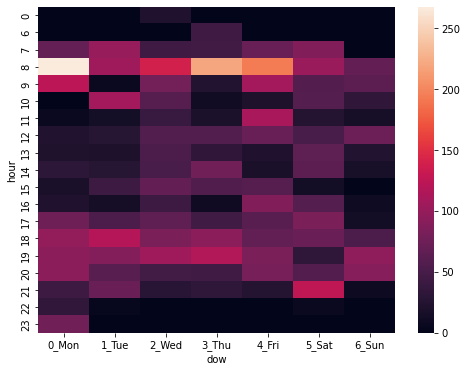

In [ ]:
#Spoil: ทำเป็น heatmap
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.heatmap(mean_likes_by_dow_time, ax=ax, annot=True, fmt='d')
ax.set_title('Mean Likes by Date of Week and Time of Day')
plt.show()

## Cross Tabulation
Cross Tabulation (a.k.a. Contingency Table) = ตารางสรุปความถี่ข้อมูลแบบแบ่งตามกลุ่ม

เราสามารถสร้าง Cross Tabulation ได้ด้วยคำสั่ง pd.crosstab() (Documentation: [pandas.crosstab](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html))

In [ ]:
#สร้าง cross tabulation ระหว่าง type กับ dow
#เพื่อหาจำนวนโพสต์แบ่งตาม type และ dow
#ทำกับ df_ten
pd.crosstab(df_ten['type'],df_ten['dow'])

dow,0_Mon,1_Tue,2_Wed,3_Thu,5_Sat
type,,,,,
album,1,0,0,1,2
link,0,0,1,0,0
photo,0,1,0,0,0
video,0,2,2,0,0


In [ ]:
#ลองเช็คกับการใช้ groupby
df_ten.groupby(['type','dow'])['likes'].count().unstack().fillna(0).astype(int)

dow,0_Mon,1_Tue,2_Wed,3_Thu,5_Sat
type,,,,,
album,1,0,0,1,2
link,0,0,1,0,0
photo,0,1,0,0,0
video,0,2,2,0,0


In [ ]:
#จริงๆ แล้วเราใช้ pd.crosstab() เสมือนเป็น pivot table ได้ด้วย
pd.crosstab(df_ten['type'],df_ten['dow'],values=df_ten['likes'], aggfunc='sum').fillna(0).astype(int)

dow,0_Mon,1_Tue,2_Wed,3_Thu,5_Sat
type,,,,,
album,49,0,0,32,116
link,0,0,22,0,0
photo,0,8,0,0,0
video,0,32,145,0,0


# Concatenating and Joining Tables
ในการทำงานจริง เราอาจต้องเล่นกับข้อมูลมากกว่า 1 ตารางที่สัมพันธ์กัน เช่น 

**Scenario 1**: เรามีตาราง transactions การซื้อสินค้าที่ 1 ตารางคือข้อมูลของแต่ละไตรมาส ถ้าเราต้องการตารางเดียวที่มีข้อมูล transactions ครบทั้งปี ก็ต้องเอาตารางเหล่านี้มาต่อกัน

**Scenario 2**: เรามีตาราง transactions กับตารางข้อมูล demographics ของลูกค้าแต่ละคน ถ้าเราอยากวิเคราะห์ว่า ลูกค้าแต่ละคนมีพฤติกรรมการซื้อสินค้าอย่างไร เราก็จำเป็นต้องเชื่อมข้อมูลในตาราง 2 ตารางนี้เข้าด้วยกัน โดยใช้ key เป็นรหัสลูกค้า เป็นต้น

## Concatenating Tables
เราต่อตารางเข้าด้วยกันได้ด้วยคำสั่ง pd.concat() (Documentation: [pandas.concat](https://pandas.pydata.org/docs/reference/api/pandas.concat.html))

In [ ]:
#เล่นกับ toy dataset เพื่อทำความเข้าใจ
df_jan = pd.DataFrame({'customer':['Great','Cherprang','Jennie'], 'deposit':[200,10000,5000]})
df_feb = pd.DataFrame({'customer':['Cherprang','Jisoo'], 'deposit':[3000,2000]})
df_mar = pd.DataFrame({'customer':['Jennie','Great','Somchai'], 'deposit':[4000,100,99]})

In [ ]:
df_jan

,customer,deposit
0,Great,200
1,Cherprang,10000
2,Jennie,5000


In [ ]:
df_feb

,customer,deposit
0,Cherprang,3000
1,Jisoo,2000


In [ ]:
df_mar

,customer,deposit
0,Jennie,4000
1,Great,100
2,Somchai,99


In [ ]:
#ต่อ df ทั้งสามเข้าเป็นอันเดียวใส่ตัวแปร df_q1
#ตั้งค่า axis ให้ถูกต้อง
df_q1 = pd.concat([df_jan,df_feb,df_mar],axis=0)
df_q1

,customer,deposit
0,Great,200
1,Cherprang,10000
2,Jennie,5000
0,Cherprang,3000
1,Jisoo,2000
0,Jennie,4000
1,Great,100
2,Somchai,99


In [ ]:
#Reset index ใหม่
df_q1.reset_index(drop=True ,inplace=True)
df_q1

,customer,deposit
0,Great,200
1,Cherprang,10000
2,Jennie,5000
3,Cherprang,3000
4,Jisoo,2000
5,Jennie,4000
6,Great,100
7,Somchai,99


## Joining/Merging Tables
เราเชื่อมตารางเข้าด้วยกันได้ด้วยคำสั่ง pd.merge() (Documentation: [pandas.merge](https://pandas.pydata.org/docs/reference/api/pandas.merge.html))

In [ ]:
#เล่นกับ toy dataset เพื่อทำความเข้าใจ
df_band = pd.DataFrame({
    'customer': ['Cherprang','Jennie','Jisoo','Great','Ta'],
    'band': ['BNK48','Blackpink','Blackpink','Skooldio','Skooldio']
})
df_band

,customer,band
0,Cherprang,BNK48
1,Jennie,Blackpink
2,Jisoo,Blackpink
3,Great,Skooldio
4,Ta,Skooldio


In [ ]:
#เชื่อมข้อมูล band ของแต่ละ customer เข้ากับ df_q1
#โดยยึด df_q1 เป็นหลัก แล้วเอาข้อมูล band มา join
#ตั้งชื่อตัวแปรว่า df_merge
df_merge = pd.merge(df_q1,df_band,on='customer',how='left')
df_merge

,customer,deposit,band
0,Great,200,Skooldio
1,Cherprang,10000,BNK48
2,Jennie,5000,Blackpink
3,Cherprang,3000,BNK48
4,Jisoo,2000,Blackpink
5,Jennie,4000,Blackpink
6,Great,100,Skooldio
7,Somchai,99,NaN


In [ ]:
#แต่ถ้าเราไม่อยากเอาคนที่ไม่มี band ไว้ จะทำอย่างไร?
#ตั้งชื่อตัวแปรว่า df_hasband
df_hasband = pd.merge(df_q1,df_band,on='customer',how='inner')
df_hasband

,customer,deposit,band
0,Great,200,Skooldio
1,Great,100,Skooldio
2,Cherprang,10000,BNK48
3,Cherprang,3000,BNK48
4,Jennie,5000,Blackpink
5,Jennie,4000,Blackpink
6,Jisoo,2000,Blackpink


In [ ]:
#แต่ละวงฝากเงินเท่าไหร่?
df_hasband.groupby('band')['deposit'].sum()

band
BNK48        13000
Blackpink    11000
Skooldio       300
Name: deposit, dtype: int64